In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# Import dataset
df = pd.read_csv("C:\\Users\\melod\\DEEP 2022\\thyroid.csv")

In [109]:
# Look at first five rows
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [110]:
# Number of data points
df.shape

(9008, 31)

In [111]:
df.dtypes

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
dtype: object

# Cleaning Data

In [112]:
# drop columns with insignificant variables
df.drop(labels = ["query_on_thyroxine","psych", "TSH_measured", "T3_measured", "TT4_measured", "T4U_measured",
                 "FTI_measured", "TBG_measured", "referral_source"], axis = 1, inplace = True)

In [113]:
# Number of missing values in each column
df.isna().sum()

age                       0
sex                     302
on_thyroxine              0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
TSH                     839
T3                     2603
TT4                     442
T4U                     804
FTI                     797
TBG                    8659
target                    0
patient_id                0
dtype: int64

In [114]:
df = df.dropna(subset=['sex']) # remove all rows in dataset where sex is missing

In [115]:
# Impute quantitative variables
df['TSH']=df['TSH'].fillna(df['TSH'].mean())

In [116]:
df['T3']=df['T3'].fillna(df['T3'].mean())

In [117]:
df['T4U']=df['T4U'].fillna(df['T4U'].mean())

In [118]:
df['FTI']=df['FTI'].fillna(df['FTI'].mean())

In [119]:
df['TBG']=df['TBG'].fillna(df['TBG'].mean())

In [120]:
df['TT4']=df['TT4'].fillna(df['TT4'].mean())

In [121]:
df.isna().sum()

age                    0
sex                    0
on_thyroxine           0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
TBG                    0
target                 0
patient_id             0
dtype: int64

In [122]:
# function for mapping strings to integers
def booltoint(dictionary, col):
    df[col] = df[col].map(dictionary)

In [123]:
d = {'t' : 1, 'f': 0}
booltypes = ["on_thyroxine", "on_antithyroid_meds", "sick", "pregnant", "thyroid_surgery",
             "I131_treatment", "query_hypothyroid", "query_hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary"]

for column in booltypes:
    booltoint(d, column)

In [124]:
## Remove age > 100
df = df[(df["age"] < 100)]

In [125]:
target_encoded={j:i for i,j in enumerate(df['target'].unique())}
target=[target_encoded[i] for i in df['target'].values]
target=np.array(target).reshape(-1,1)

In [126]:
df.dtypes

age                      int64
sex                     object
on_thyroxine             int64
on_antithyroid_meds      int64
sick                     int64
pregnant                 int64
thyroid_surgery          int64
I131_treatment           int64
query_hypothyroid        int64
query_hyperthyroid       int64
lithium                  int64
goitre                   int64
tumor                    int64
hypopituitary            int64
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
FTI                    float64
TBG                    float64
target                  object
patient_id               int64
dtype: object

# Visualizations

Text(0.5, 1.0, 'Distribution of Patient Age')

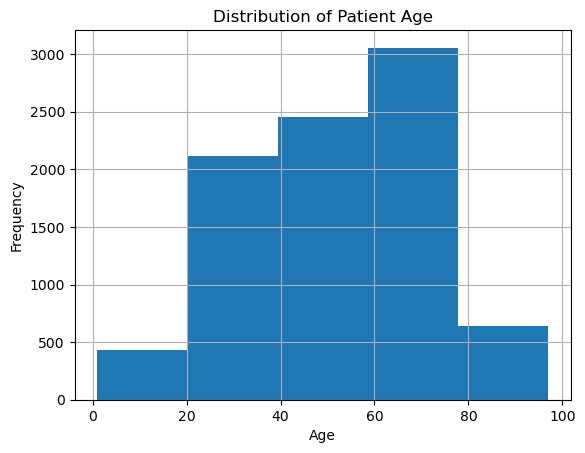

In [39]:
## Distribution of age
df["age"].hist(bins = 5)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Age")

In [40]:
## Sex
sex_df = df["sex"].value_counts().to_frame().reset_index()
sex_df.columns = ["sex","Frequency"]
total = sum(sex_df["Frequency"])
sex_df["Proportion"] = (sex_df["Frequency"]/total)*100

Text(0.5, 1.0, 'Proportion of Sex in Patients')

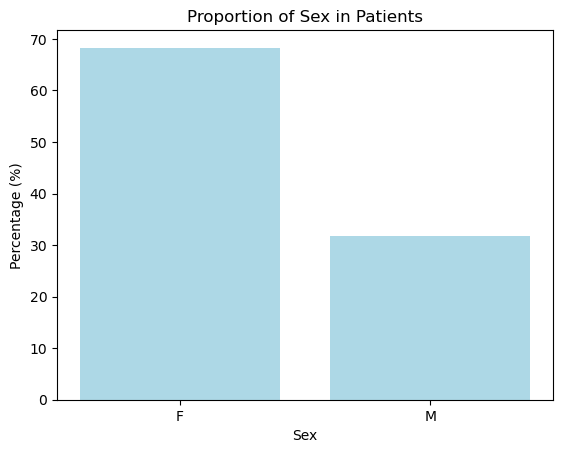

In [47]:
plt.bar(sex_df["sex"],sex_df["Proportion"],color="lightblue")
plt.xlabel("Sex")
plt.ylabel("Percentage (%)")
plt.title("Proportion of Sex in Patients")

Text(0.5, 1.0, 'T3 vs. TT4 level in blood')

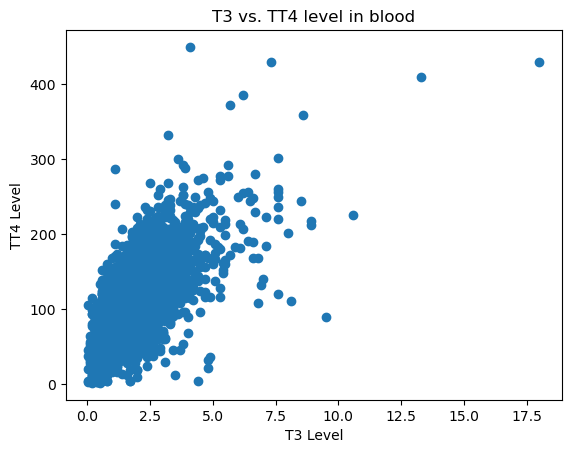

In [52]:
plt.scatter("T3","TT4",data = df)
plt.xlabel("T3 Level")
plt.ylabel("TT4 Level")
plt.title("T3 vs. TT4 level in blood")

Text(0.5, 1.0, 'T3 vs. T4U level in blood')

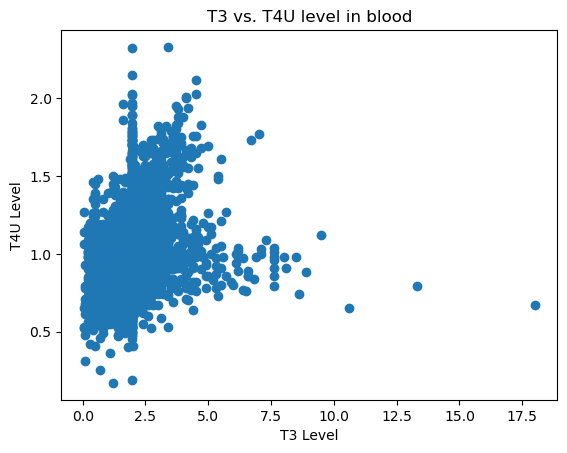

In [41]:
plt.scatter("T3","T4U",data = df)
plt.xlabel("T3 Level")
plt.ylabel("T4U Level")
plt.title("T3 vs. T4U level in blood")

In [42]:
import seaborn as sns

In [127]:
sub = df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]

<AxesSubplot:>

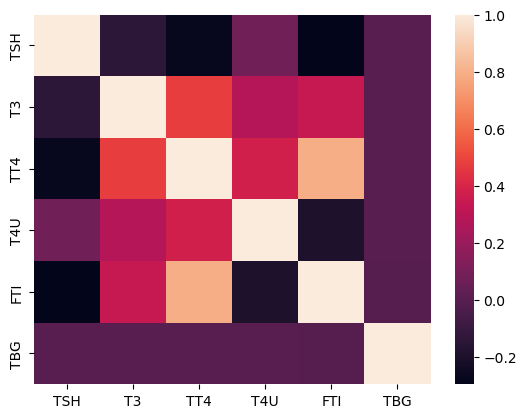

In [128]:
sns.heatmap(sub.corr()) # correlation heatmap

# CLASSIFICATION

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [132]:
x = df[['age', 'lithium','goitre', 'tumor', 'hypopituitary', 'TSH','T3','TT4', 'T4U','FTI',  'TBG']] 
x = x.values

In [133]:
x=StandardScaler().fit_transform(x)

In [135]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, target, test_size = 0.2)

In [136]:
rct=RandomForestClassifier(max_depth=31,n_estimators=5000).fit(x_train,y_train)

C:\Users\melod\AppData\Local\Temp\ipykernel_4804\3328901907.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rct=RandomForestClassifier(max_depth=31,n_estimators=5000).fit(x_train,y_train)


In [137]:
pred=rct.predict(x_test)

In [138]:
report=classification_report(y_test.reshape(-1,),pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1311
           1       0.93      1.00      0.97        14
           2       0.98      0.96      0.97        46
           3       0.62      0.48      0.55        31
           4       0.81      0.82      0.82        73
           5       0.30      0.16      0.21        19
           6       0.60      0.65      0.63        23
           7       0.74      0.88      0.80        64
           8       0.81      0.92      0.86        91
           9       0.50      0.86      0.63        22
          10       0.59      0.41      0.48        32
          11       0.00      0.00      0.00         2
          12       0.67      0.67      0.67         3
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         1

    accuracy              

C:\Users\melod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melod\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
